## MLP for Binary Classification

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.



In [1]:
# Importing Libraries

# Your code to import read_csv class from pandas
from pandas import read_csv

# Your code to import train_test_split class from sklearn. 
#Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 

In [2]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

# Your code to read the csv from the above path.
df = read_csv(path, header=None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Link to API:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [3]:
# Your code to print first few rows of the dataset.
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use dataframe.info() from pandas library


In [4]:
# Your code to print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe. Select suitable API call from the pandas library

In [5]:
# Your code to print the shape of the dataset
df.shape

(351, 35)

# Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


In [6]:
X = df.values[:, :-1]

# Your code to get y - Hint y = df.values[:, some parameters]
y = df.values[:, -1]


We have converted everthing in X to 'float' and the letters in column y to the numbers in the following cell.

In [7]:
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

In [8]:
LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, 
# *i.e.* `y`, and not the input `X`.

In [9]:
LabelEncoder.fit_transform?

Printing the genral information of the X and y in the following cell

In [10]:
# Your code to print X
print(X)

# Your code to print y
print(y)

# your code to print shape of X. Remember X is a numpy array
print(X.shape)

# your code to print shape of y. Remember y is a numpy array
print(y.shape)


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

* Separate X and y into training and test set with a ratio of your choice. 
* Print the shapes of the resulting arrays.
* Get the number of features from X_train. Remember the number of features are the number of inputs.

Use sklearn train_test_split class.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [11]:
train_test_split?

In [12]:
# Your code to separate the data into trauning and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


n_features = X_train.shape[1]
n_features

(235, 34) (116, 34) (235,) (116,)


34

In [13]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [14]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0])

# Creating a Multi-layer Perceptron using Keras.
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose

https://keras.io/api/layers/core_layers/dense/

In [15]:
# define model

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(8, activation='relu'))



model.add(Dense(1, activation='sigmoid'))

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                350       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________
None


In the next cell, we trained the above neural network model and tested its accuracy. As this concept has still not benn covered in the class, just run the code to check the accuracy.

In [17]:
# compile the model

# Training method: optimizer - "adam"
# adam (Adaptive Moment Estimation) Optimizer is one of the most common optimizers
# Measure of error in the Backpropagation algorithm: 'binary_crossentropy'
# The metric by which we will perform optimization is 'accuracy'

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# fit the model

# mini-sample size batch_size = 32, we analyze at each step 32 lines,
# we determine the direction of the gradient from them and, in accordance with this
# determine the size of the weights
# the number of epochs = 150 - those how many times we carry out training 
# verbose = 1 - printing information in the learning process

history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150


2024-04-20 12:01:30.881656: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7106
Epoch 2/150
8/8 [==============================] - 0s 720us/step - loss: 0.5700 - accuracy: 0.7404
Epoch 3/150
8/8 [==============================] - 0s 535us/step - loss: 0.5526 - accuracy: 0.7532
Epoch 4/150
8/8 [==============================] - 0s 734us/step - loss: 0.5353 - accuracy: 0.7830
Epoch 5/150
8/8 [==============================] - 0s 525us/step - loss: 0.5203 - accuracy: 0.8043
Epoch 6/150
8/8 [==============================] - 0s 603us/step - loss: 0.5045 - accuracy: 0.8170
Epoch 7/150
8/8 [==============================] - 0s 682us/step - loss: 0.4907 - accuracy: 0.8255
Epoch 8/150
8/8 [==============================] - 0s 661us/step - loss: 0.4774 - accuracy: 0.8340
Epoch 9/150
8/8 [==============================] - 0s 696us/step - loss: 0.4655 - accuracy: 0.8426
Epoch 10/150
8/8 [==============================] - 0s 546us/step - loss: 0.4542 - accuracy: 0.8511
Epoch 11/150
8/8 [=====

8/8 [==============================] - 0s 490us/step - loss: 0.1029 - accuracy: 0.9745
Epoch 84/150
8/8 [==============================] - 0s 587us/step - loss: 0.1021 - accuracy: 0.9745
Epoch 85/150
8/8 [==============================] - 0s 482us/step - loss: 0.1000 - accuracy: 0.9787
Epoch 86/150
8/8 [==============================] - 0s 483us/step - loss: 0.0990 - accuracy: 0.9787
Epoch 87/150
8/8 [==============================] - 0s 528us/step - loss: 0.0983 - accuracy: 0.9787
Epoch 88/150
8/8 [==============================] - 0s 841us/step - loss: 0.0967 - accuracy: 0.9787
Epoch 89/150
8/8 [==============================] - 0s 511us/step - loss: 0.0958 - accuracy: 0.9787
Epoch 90/150
8/8 [==============================] - 0s 486us/step - loss: 0.0949 - accuracy: 0.9787
Epoch 91/150
8/8 [==============================] - 0s 477us/step - loss: 0.0940 - accuracy: 0.9787
Epoch 92/150
8/8 [==============================] - 0s 487us/step - loss: 0.0928 - accuracy: 0.9787
Epoch 93/150


In [19]:
# evaluate the model

loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 719us/step - loss: 0.2124 - accuracy: 0.9052
Test Accuracy: 0.905


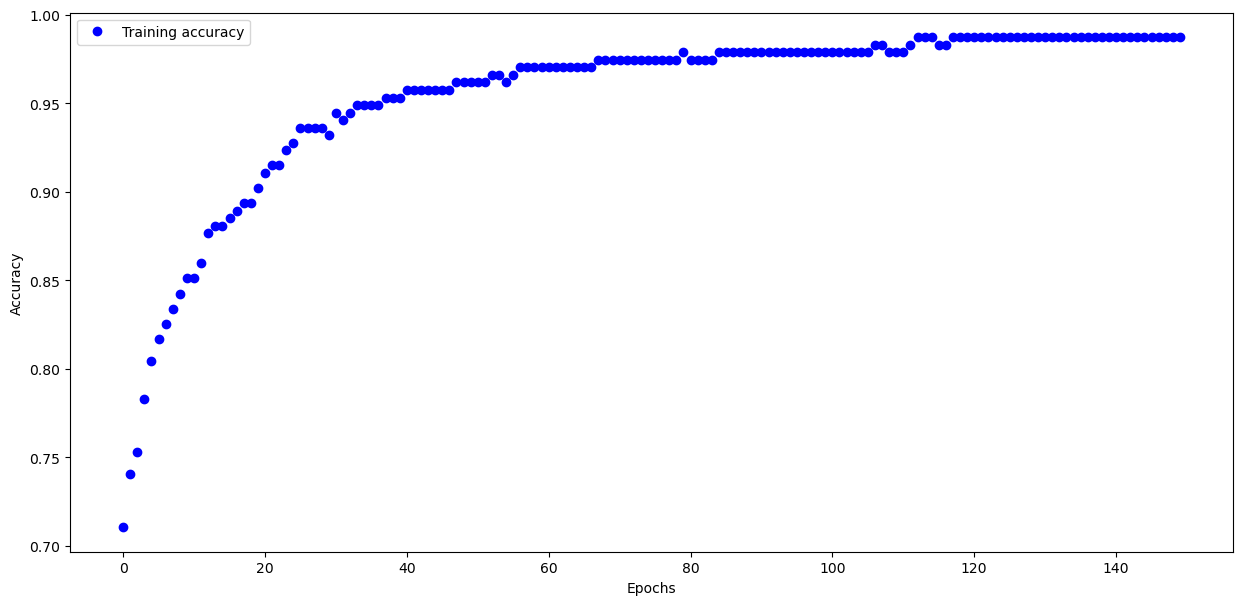

In [20]:
# Accuracy graphs during training
import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model and activation function to get the better accuracy as compared to your peers **

In [21]:
Dense?

In [22]:
# define the NEW model

model = Sequential()
model.add(Dense(10, activation='gelu', input_shape=(n_features,)))


#
# Add as many layers with activation functions of your choice
#
model.add(Dense(8, activation='gelu'))
model.add(Dense(5, activation='gelu'))


model.add(Dense(1, activation='sigmoid'))

In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                350       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history2 = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 0s 638us/step - loss: 0.6889 - accuracy: 0.6298
Epoch 2/150
8/8 [==============================] - 0s 568us/step - loss: 0.6739 - accuracy: 0.6766
Epoch 3/150
8/8 [==============================] - 0s 563us/step - loss: 0.6553 - accuracy: 0.6766
Epoch 4/150
8/8 [==============================] - 0s 705us/step - loss: 0.6335 - accuracy: 0.6851
Epoch 5/150
8/8 [==============================] - 0s 585us/step - loss: 0.6092 - accuracy: 0.6809
Epoch 6/150
8/8 [==============================] - 0s 1ms/step - loss: 0.5819 - accuracy: 0.6723
Epoch 7/150
8/8 [==============================] - 0s 562us/step - loss: 0.5582 - accuracy: 0.6766
Epoch 8/150
8/8 [==============================] - 0s 681us/step - loss: 0.5447 - accuracy: 0.6766
Epoch 9/150
8/8 [==============================] - 0s 627us/step - loss: 0.5311 - accuracy: 0.6766
Epoch 10/150
8/8 [==============================] - 0s 547us/step - loss: 0.5205 - accuracy: 0.6851
Epoch 11/15

8/8 [==============================] - 0s 616us/step - loss: 0.0766 - accuracy: 0.9787
Epoch 84/150
8/8 [==============================] - 0s 524us/step - loss: 0.0752 - accuracy: 0.9787
Epoch 85/150
8/8 [==============================] - 0s 514us/step - loss: 0.0750 - accuracy: 0.9830
Epoch 86/150
8/8 [==============================] - 0s 567us/step - loss: 0.0700 - accuracy: 0.9830
Epoch 87/150
8/8 [==============================] - 0s 490us/step - loss: 0.0703 - accuracy: 0.9787
Epoch 88/150
8/8 [==============================] - 0s 526us/step - loss: 0.0684 - accuracy: 0.9830
Epoch 89/150
8/8 [==============================] - 0s 564us/step - loss: 0.0677 - accuracy: 0.9830
Epoch 90/150
8/8 [==============================] - 0s 510us/step - loss: 0.0659 - accuracy: 0.9830
Epoch 91/150
8/8 [==============================] - 0s 496us/step - loss: 0.0636 - accuracy: 0.9787
Epoch 92/150
8/8 [==============================] - 0s 505us/step - loss: 0.0624 - accuracy: 0.9787
Epoch 93/150


In [26]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 684us/step - loss: 0.5629 - accuracy: 0.8621
Test Accuracy: 0.862


### Important: Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.
### In addition to the accuracy, also document the output of the neural network as provided in Task 2.

Next, we have provided the code to predict on an unknown value.
We will cover these concepts later in the class. For now, just run the code to see the prediction.

In [27]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 44ms/step
Predicted: 0.999


## One more model

In [28]:
# More info regarding 
# tensorflow.keras.initializers.he_normal()

#  https://keras.io/api/layers/initializers/
#  https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal

In [29]:
model_2 = Sequential()
model_2.add(Dense(17, activation='relu', input_shape=(n_features,), kernel_initializer="he_normal"))
model_2.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model_2.add(Dense(1, activation='sigmoid'))

In [30]:
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 17)                595       
                                                                 
 dense_8 (Dense)             (None, 10)                180       
                                                                 
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 872
Trainable params: 872
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history_3 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 0s 620us/step - loss: 0.7425 - accuracy: 0.4128
Epoch 2/150
8/8 [==============================] - 0s 517us/step - loss: 0.7216 - accuracy: 0.6681
Epoch 3/150
8/8 [==============================] - 0s 589us/step - loss: 0.7059 - accuracy: 0.6638
Epoch 4/150
8/8 [==============================] - 0s 656us/step - loss: 0.6862 - accuracy: 0.6723
Epoch 5/150
8/8 [==============================] - 0s 621us/step - loss: 0.6610 - accuracy: 0.6723
Epoch 6/150
8/8 [==============================] - 0s 534us/step - loss: 0.6361 - accuracy: 0.6851
Epoch 7/150
8/8 [==============================] - 0s 917us/step - loss: 0.6149 - accuracy: 0.6894
Epoch 8/150
8/8 [==============================] - 0s 619us/step - loss: 0.5939 - accuracy: 0.6979
Epoch 9/150
8/8 [==============================] - 0s 569us/step - loss: 0.5736 - accuracy: 0.6979
Epoch 10/150
8/8 [==============================] - 0s 617us/step - loss: 0.5548 - accuracy: 0.7106
Epoch 11/

8/8 [==============================] - 0s 573us/step - loss: 0.0328 - accuracy: 0.9957
Epoch 84/150
8/8 [==============================] - 0s 565us/step - loss: 0.0297 - accuracy: 0.9957
Epoch 85/150
8/8 [==============================] - 0s 550us/step - loss: 0.0311 - accuracy: 0.9957
Epoch 86/150
8/8 [==============================] - 0s 570us/step - loss: 0.0295 - accuracy: 0.9957
Epoch 87/150
8/8 [==============================] - 0s 615us/step - loss: 0.0285 - accuracy: 0.9957
Epoch 88/150
8/8 [==============================] - 0s 536us/step - loss: 0.0283 - accuracy: 0.9957
Epoch 89/150
8/8 [==============================] - 0s 697us/step - loss: 0.0282 - accuracy: 0.9957
Epoch 90/150
8/8 [==============================] - 0s 600us/step - loss: 0.0265 - accuracy: 0.9957
Epoch 91/150
8/8 [==============================] - 0s 537us/step - loss: 0.0275 - accuracy: 0.9957
Epoch 92/150
8/8 [==============================] - 0s 530us/step - loss: 0.0263 - accuracy: 0.9957
Epoch 93/150


In [33]:
loss, acc = model_2.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)

4/4 [==============================] - 0s 756us/step - loss: 0.3353 - accuracy: 0.9052
Test Accuracy: 0.905


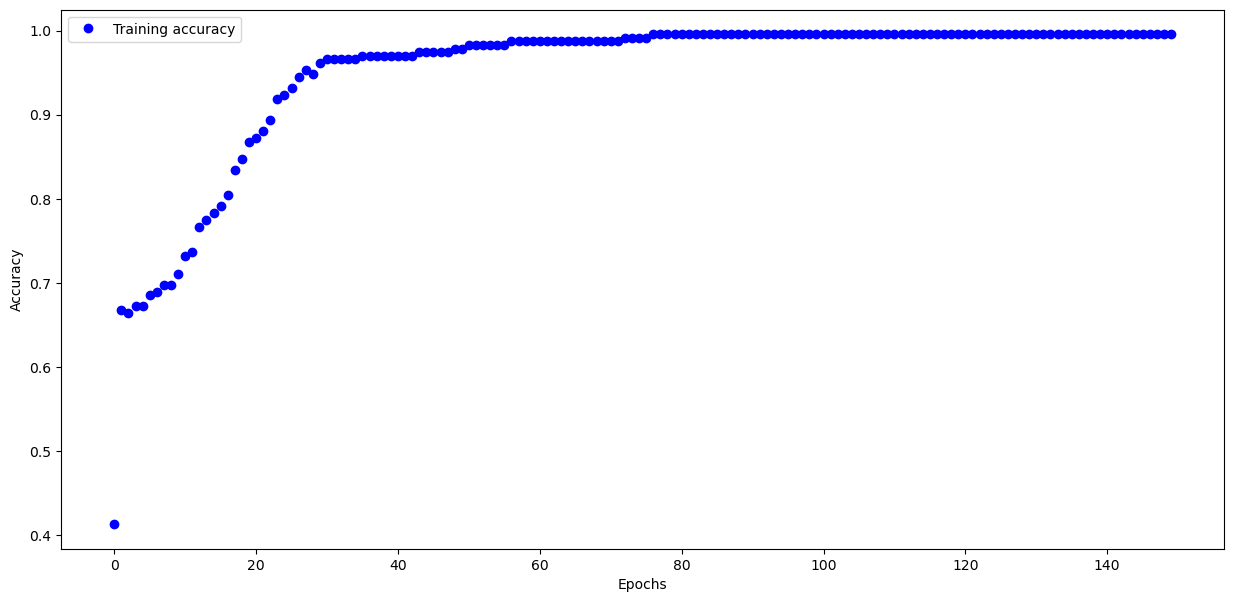

In [34]:
history_dict = history_3.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
row = [1,0,0.99539,-0.05889,0.85243,0.02306,
       0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
       0.59755,-0.44945,0.60536,-0.38223,0.84356,
       -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
       -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
       -0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model_2.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 33ms/step
Predicted: 0.997


In [36]:
# 100 % - enchanting result!

### Try out the same model with Keras Functional models!
Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/


#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.

#### An example of a model with multiple inputs and multiple outputs:

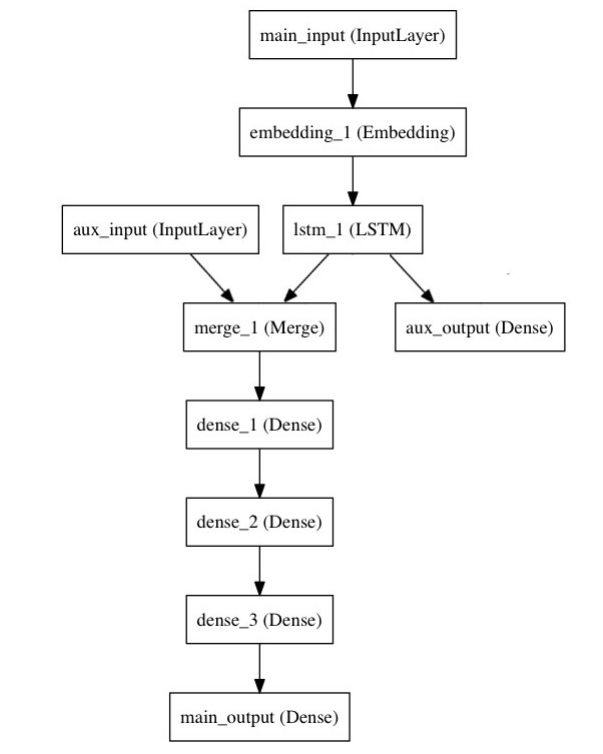

In [37]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense


In [38]:
# define the layers

x_in = Input(shape=(n_features,))

x_in

<KerasTensor: shape=(None, 34) dtype=float32 (created by layer 'input_1')>

In [39]:
x_1 = Dense(10, activation='relu')(x_in)
x_2 = Dense(8, activation='relu')(x_1)
x_out = Dense(1, activation='sigmoid')(x_2)

In [40]:
# define model

model_3 = Model(inputs=x_in, outputs=x_out)

In [41]:
print(model_3.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense_11 (Dense)            (None, 10)                350       
                                                                 
 dense_12 (Dense)            (None, 8)                 88        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# compile the model

model_3.compile(optimizer="adam",
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [43]:
# fit the model

history_4 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
8/8 [==============================] - 0s 582us/step - loss: 0.7599 - accuracy: 0.3404
Epoch 2/150
8/8 [==============================] - 0s 557us/step - loss: 0.7276 - accuracy: 0.3702
Epoch 3/150
8/8 [==============================] - 0s 675us/step - loss: 0.7043 - accuracy: 0.4298
Epoch 4/150
8/8 [==============================] - 0s 595us/step - loss: 0.6806 - accuracy: 0.5830
Epoch 5/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.7191
Epoch 6/150
8/8 [==============================] - 0s 627us/step - loss: 0.6371 - accuracy: 0.7106
Epoch 7/150
8/8 [==============================] - 0s 787us/step - loss: 0.6164 - accuracy: 0.7149
Epoch 8/150
8/8 [==============================] - 0s 512us/step - loss: 0.5993 - accuracy: 0.7064
Epoch 9/150
8/8 [==============================] - 0s 509us/step - loss: 0.5862 - accuracy: 0.6936
Epoch 10/150
8/8 [==============================] - 0s 743us/step - loss: 0.5739 - accuracy: 0.6936
Epoch 11/15

8/8 [==============================] - 0s 520us/step - loss: 0.1423 - accuracy: 0.9532
Epoch 84/150
8/8 [==============================] - 0s 545us/step - loss: 0.1403 - accuracy: 0.9489
Epoch 85/150
8/8 [==============================] - 0s 456us/step - loss: 0.1375 - accuracy: 0.9574
Epoch 86/150
8/8 [==============================] - 0s 556us/step - loss: 0.1355 - accuracy: 0.9702
Epoch 87/150
8/8 [==============================] - 0s 471us/step - loss: 0.1361 - accuracy: 0.9702
Epoch 88/150
8/8 [==============================] - 0s 496us/step - loss: 0.1328 - accuracy: 0.9702
Epoch 89/150
8/8 [==============================] - 0s 477us/step - loss: 0.1302 - accuracy: 0.9702
Epoch 90/150
8/8 [==============================] - 0s 477us/step - loss: 0.1287 - accuracy: 0.9702
Epoch 91/150
8/8 [==============================] - 0s 490us/step - loss: 0.1270 - accuracy: 0.9702
Epoch 92/150
8/8 [==============================] - 0s 450us/step - loss: 0.1259 - accuracy: 0.9702
Epoch 93/150


In [44]:
# evaluate the model

loss, acc = model_3.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.888


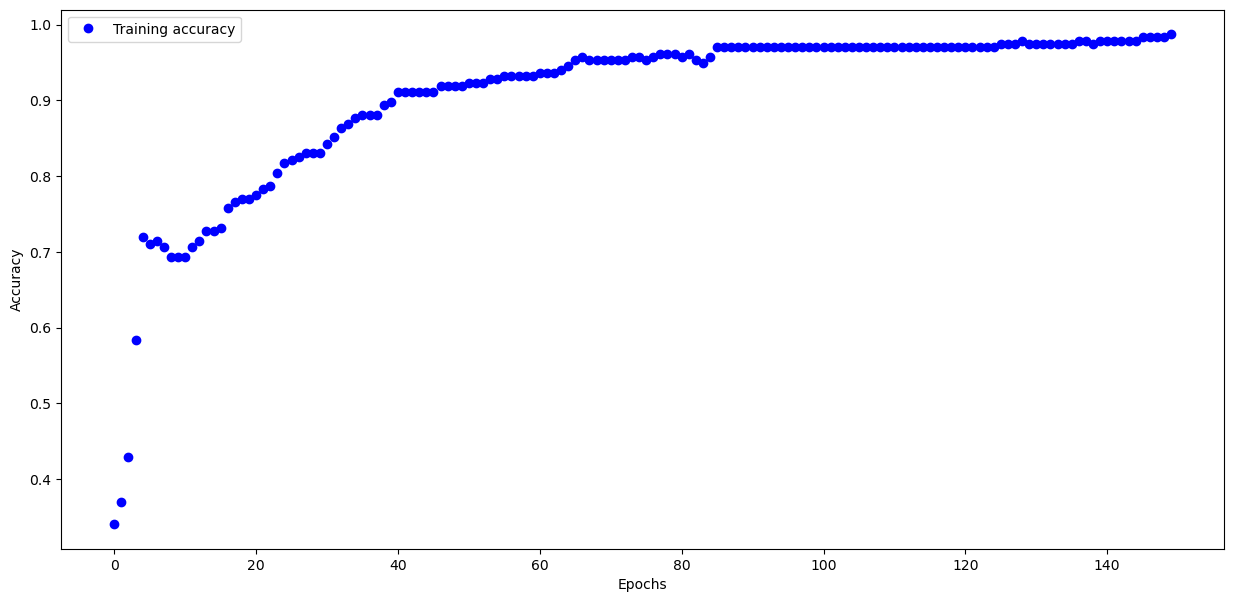

In [45]:
history_dict = history_4.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# make a prediction - Copy a row of your choice!

row = [1,0,0.99539,-0.05889,0.85243,0.02306,
 0.83398,-0.37708,1,0.03760,0.85243,-0.17755,
 0.59755,-0.44945,0.60536,-0.38223,0.84356,
 -0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,
 -0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,
 -0.34090,0.42267,-0.54487,0.18641,-0.45300]

yhat = model_3.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 33ms/step
Predicted: 0.944
